Example based on https://github.com/CybJaz/dyrect

In [1]:
import math
import numpy as np
from plyfile import PlyData

from src import Complex
from src import CombinatorialHierarchicalClustering, DTWHierarchicalClustering
from src import TopologicalClustering, HodgeLaplacianClustering
from src import generate_points, EpsilonNet, Seer, symbolization, load_plyfile

np.random.seed(seed=0)

# Example no 1 wih paths generated using Thomas equation:

Equation taken from https://www.dynamicmath.xyz/calculus/velfields/Thomas/

In [2]:
def thomas_eq(_, args):
    b = 0.2
    return [math.sin(args[1]) - b*args[0],
           math.sin(args[2]) - b*args[1],
           math.sin(args[0]) - b*args[2]]

train_points = generate_points(thomas_eq, 3, [1.1, 1.1, -0.01], 20000, step = 0.04)
test_points = generate_points(thomas_eq, 3, [1.3, -0.2, 0.], 5000, step=0.04)

In [3]:
eps = 0.1
EN = EpsilonNet(eps, 300)
dists = EN.fit(train_points)
lms = EN.landmarks
eps = 2
symbs = symbolization(test_points, lms, eps)
seer = Seer(train_points, lms, eps)

In [4]:
t0 = 4000
tpredict = 500
t1 = t0 + 3
query = test_points[t0:t1]
prediction = seer.predict(query, tpredict)

In [6]:
rips_lms = Complex(lms, max_edge_length=0.8)

hc = CombinatorialHierarchicalClustering(rips_lms)
hc.draw_predict(seer.paths(40), 500, to_file=False)
hc.clusters

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 16 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3]


In [6]:
tc = TopologicalClustering(rips_lms)
tc.fit_predict((seer.paths(40, True, rips_lms)), 250)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

# Example no 2 with paths generated using Lorenz equation:

Importing the model to discretize the Lorenz atractor:

In [7]:
def load_ply_model(filename):
    plydata = PlyData.read(filename)
    coords = np.array([list(x) for x in plydata.elements[0].data])
    return coords

lms = load_ply_model('lorenz_model_20.ply')
lms.shape

(348, 3)

In [8]:
def lorentz_eq(_, args):
    l_sigma = 10.
    l_beta = 8. / 3
    l_rho = 28.
    return [l_sigma * (args[1] - args[0]),
            args[0] * (l_rho - args[2]) - args[1],
            args[0] * args[1] - l_beta * args[2]]

 
train_points = generate_points(lorentz_eq, 3, [1., 1., 1.], 200000)
test_points = generate_points(lorentz_eq, 3, [-1., -1., 1.], 5000)
eps = 4
symbs = symbolization(test_points, lms, eps)
seer = Seer(train_points, lms, eps)

In [9]:
t0 = 100 
tpredict = 80
t1 = t0 + 4

query = test_points[t0:t1]
prediction = seer.predict(query, tpredict)

In [10]:
rips_lms = Complex(lms, max_edge_length=4)
rips_lms.draw_complex(to_file=False)

hc = CombinatorialHierarchicalClustering(rips_lms)
hc.fit_predict(seer.paths(30), 300)

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1], dtype=int32)

In [11]:
rips_lms.points

array([[ 12.814419  ,   3.715436  ,  40.391262  ],
       [  3.4611812 ,   5.6139092 ,  15.84632   ],
       [  4.4778523 ,   0.57740474,  27.94885   ],
       ...,
       [ -6.260468  ,  -1.2317675 ,  30.492884  ],
       [-14.929163  , -14.297298  ,  36.342613  ],
       [ -8.185161  , -16.455061  ,   7.8023095 ]], dtype=float32)

In [12]:
tc = TopologicalClustering(rips_lms)
tc.draw_predict(seer.paths(30, True, rips_lms), 40, 1,to_file=False)
tc.clusters

array([1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 1], dtype=int8)

In [13]:
dc = DTWHierarchicalClustering(rips_lms)
dc.fit_predict(seer.paths(30), 300)

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1], dtype=int32)

In [14]:
dc.clusters

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1], dtype=int32)

In [15]:
#p, i = seer.paths(fix_disconnected=True, complex=rips_lms)
#p[0], i[0]

Example with loading simplexes from a file:

In [18]:
points, simplexes = load_plyfile("lorenz_20_after_patching_level_3.ply")
C = Complex(points, simplexes)

In [19]:
C.two_simplexes()

array([[  0,  35, 247],
       [  0,  35, 254],
       [  0,  81, 162],
       ...,
       [256, 275, 310],
       [258, 259, 261],
       [274, 284, 308]])

In [20]:
C.draw_complex(to_file=False)
pass

In [21]:
coords = np.array([0,1,2] * 7)
simplices = {}
simplices[0] = [(v,) for v in range(8)]
simplices[1] = [(1,2),(1,3),(1,4),(3,4),(2,3),(3,6),(5,4),(5,6),(6,7),(5,7)]
simplices[2] = [(1,3,4),(7,5,6)]

In [22]:
my_c = Complex(coords, simplices)

In [23]:
my_c.two_simplexes()

array([[1, 3, 4],
       [5, 6, 7]])

In [24]:
hlc = HodgeLaplacianClustering(my_c)
#a = hlc.fit(np.array([[1,3,3,6,7],[1,4,3,6,7],[1,3,6,6,7],[1,4,3,6,6],[1,2,3,6,7],[1,2,3,3,6],[1,2,3,6,5],[1,4,5,5,6]]))
a = hlc.fit(np.array([[1,2,3,6,7],[1,3,6,7,5],[1,4,3,6,7],[1,4,3,6,5]]))

[[-0.53691803 -1.04242194 -0.19485351 -0.60294475]
 [ 0.62549363  0.79232021  0.88498479  0.44903265]]


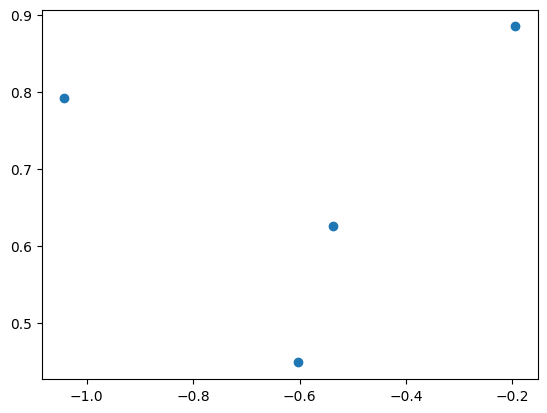

In [25]:
import matplotlib.pyplot as plt
plt.scatter(a[0], a[1])